# Querying a Population and Plotting the Results

Before we can query a population, we must have one. We will use a population of satellites as an example.

In this portion of the tutorial we will query and plot the undigested population data, and not their implications. All of the queries here are analogous to similar or identical queries in Structured Query Language (SQL). 

For simplicity we still use the same pre-analyzed population database (.bdb file) as in other portions of the tutorial, even though it is not important that any probabilistic analysis has been done. If we have not yet downloaded that pre-analyzed database, do so now:

In [1]:
import os
import subprocess
if not os.path.exists('satellites.bdb'):
    subprocess.check_call(['curl', '-O', 'http://probcomp.csail.mit.edu/bayesdb/downloads/satellites.bdb'])

We construct a Population instance that helps us read, query, and visualize a particular population.

In [2]:
from bdbcontrib import quickstart
satellites = quickstart(name='satellites', bdb_path='satellites.bdb')

# For brevity below, we abbreviate the satellites.query function as simply q:
q = satellites.query

BQL [SELECT * FROM bayesdb_generator] ()

## Querying the data using SQL

Before querying the implications of a population, it can be useful to look at a sample of the raw data and metadata. This can be done using a combination of ordinary SQL and convenience functions built into bayeslite. We start by finding one of the most well-known satellites, the International Space Station:

In [3]:
q("SELECT * FROM satellites WHERE Name LIKE 'International Space Station%'").transpose()

BQL [SELECT * FROM satellites WHERE Name LIKE 'International Space Station%'] ()

,0
Name,International Space Station (ISS [first elemen...
Country_of_Operator,Multinational
Operator_Owner,NASA/Multinational
Users,Government
Purpose,Scientific Research
Class_of_Orbit,LEO
Type_of_Orbit,Intermediate
Perigee_km,401
Apogee_km,422
Eccentricity,0.00155


In [4]:
q('SELECT COUNT(*) FROM satellites;')

BQL [SELECT COUNT(*) FROM satellites;] ()

,"""COUNT""(*)"
0,1167


We can select multiple items using a SQL wildcard, in this case the match-anything '%' on either side of "GPS".

We ask for variables as rows and observations as columns by using `.transpose()` as we did for the ISS above. By default, observations map to rows, and variables map to columns.

In [5]:
q("SELECT * FROM satellites WHERE Name LIKE '%GPS%'").transpose()

BQL [SELECT * FROM satellites WHERE Name LIKE '%GPS%'] ()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
Name,"Navstar GPS II-10 (Navstar SVN 23, PRN 32, US...","Navstar GPS II-14 (Navstar SVN 26, PRN 26, USA...","Navstar GPS II-21 (Navstar SVN 39, PRN 09, USA...","Navstar GPS II-23 (Navstar SVN 34, PRN 04, USA...","Navstar GPS II-24 (Navstar SVN 36, PRN 06, USA...","Navstar GPS II-25 (Navstar SVN 33, PRN 03, USA...","Navstar GPS II-26 (Navstar SVN 40, PRN 10, USA...","Navstar GPS II-28 (Navstar SVN 38, PRN 08, USA...","Navstar GPS II-35 (Navstar SVN 35, PRN 30, USA...","Navstar GPS IIF-1 (Navstar SVN 62, PRN 25, USA...",...,"Navstar GPS IIR-7 (Navstar SVN 54, PRN 18, USA...","Navstar GPS IIR-8 (Navstar SVN 56, PRN 16, USA...","Navstar GPS IIR-9 (Navstar SVN 45, PRN 21, USA...","Navstar GPS IIR-M-1 (Navstar SVN 53, PRN 17, U...","Navstar GPS IIR-M-2 (Navstar SVN 52, PRN 31, U...","Navstar GPS IIR-M-3 (Navstar SVN 58, PRN 12, U...","Navstar GPS IIR-M-4 (Navstar SVN 55, PRN 15, U...","Navstar GPS IIR-M-5 (Navstar SVN 57, PRN 29, U...","Navstar GPS IIR-M-6 (Navstar SVN 48, PRN 07, U...","Navstar GPS IIR-M-8 (Navstar SVN 50, PRN 05, U..."
Country_of_Operator,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,...,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA
Operator_Owner,DoD/US Air Force,DoD/US Air Force,DoD/US Air Force,DoD/US Air Force,DoD/US Air Force,DoD/US Air Force,DoD/US Air Force,DoD/US Air Force,DoD/US Air Force,DoD/US Air Force,...,DoD/US Air Force,DoD/US Air Force,DoD/US Air Force,DoD/US Air Force,DoD/US Air Force,DoD/US Air Force,DoD/US Air Force,DoD/US Air Force,DoD/US Air Force,DoD/US Air Force
Users,Military/Commercial,Military/Commercial,Military/Commercial,Military/Commercial,Military/Commercial,Military/Commercial,Military/Commercial,Military/Commercial,Military/Commercial,Military/Commercial,...,Military/Commercial,Military/Commercial,Military/Commercial,Military/Commercial,Military/Commercial,Military/Commercial,Military/Commercial,Military/Commercial,Military/Commercial,Military/Commercial
Purpose,Navigation/Global Positioning,Navigation/Global Positioning,Navigation/Global Positioning,Navigation/Global Positioning,Navigation/Global Positioning,Navigation/Global Positioning,Navigation/Global Positioning,Navigation/Global Positioning,Navigation/Global Positioning,Navigation/Global Positioning,...,Navigation/Global Positioning,Navigation/Global Positioning,Navigation/Global Positioning,Navigation/Global Positioning,Navigation/Global Positioning,Navigation/Global Positioning,Navigation/Global Positioning,Navigation/Global Positioning,Navigation/Global Positioning,Navigation/Global Positioning
Class_of_Orbit,MEO,MEO,MEO,MEO,MEO,MEO,MEO,MEO,MEO,MEO,...,MEO,MEO,MEO,MEO,MEO,MEO,MEO,MEO,MEO,MEO
Type_of_Orbit,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
Perigee_km,19781,19959,20120,20104,19986,20080,20134,19912,20109,20188,...,20104,20155,20063,20142,20020,20206,20149,20150,20135,20160
Apogee_km,20582,20403,20244,20260,20315,20284,20227,20449,20257,20224,...,20266,20344,20433,20221,20342,20366,20213,20311,20152,20209
Eccentricity,0.01508,0.00836,0.00234,0.00294,0.0062,0.00384,0.00175,0.01011,0.00279,0.00068,...,0.00305,0.00355,0.00695,0.00149,0.00606,0.003,0.00121,0.00303,0.00032,0.00092


Select just a few variables in the data, ordering by the number of minutes it takes for the satellite to complete one orbit, measured in minutes, and sorted ascending (as opposed to `DESC`), again as in SQL:

In [6]:
q('SELECT name, dry_mass_kg, period_minutes, class_of_orbit FROM satellites ORDER BY period_minutes ASC LIMIT 10;')

BQL [SELECT name, dry_mass_kg, period_minutes, class_of_orbit FROM satellites ORDER BY period_minutes ASC LIMIT 10;] ()

,Name,Dry_Mass_kg,Period_minutes,Class_of_Orbit
0,"Advanced Orion 5 (NRO L-32, USA 223)",NaN,NaN,GEO
1,"IGS-8B (Information Gathering Satellite 8B, IG...",NaN,NaN,LEO
2,Interstellar Boundary EXplorer (IBEX),NaN,0.22,Elliptical
3,Spektr-R/RadioAstron,NaN,0.22,Elliptical
4,"SDS III-6 (Satellite Data System) NRO L-27, Gr...",NaN,14.36,GEO
5,"Advanced Orion 6 (NRO L-15, USA 237)",NaN,23.94,GEO
6,"SDS III-7 (Satellite Data System) NRO L-38, Dr...",NaN,23.94,GEO
7,RISat-2 (Radar Imaging Satellite 2),NaN,41.20,LEO
8,Kuaizhou-1 (KZ-1),NaN,90.61,LEO
9,X37-B OTV-1 (USA 240),NaN,91.54,LEO


Note that NaN is ordered before 0 in this sort.

# Plots and Graphs

Bayeslite includes statistical graphics procedures designed for easy use with data extracted from an SQL database.

Before we introduce those, let the notebook know that we would like to use and display matplotlib figures within the notebook:

In [7]:
%matplotlib inline

Let's see a menu of the easily available plotting utilities:

In [8]:
satellites.help("plot")

bdbcontrib.plot_utils.mi_hist(col1, col2, num_samples=1000, bins=5)
    Histogram of estimated mutual information between the two columns for each
    of a generator's model instances.
bdbcontrib.plot_utils.pairplot(df, generator_name=None, show_contour=False, colorby=None, show_missing=False, show_full=False, pad=None, h_pad=None, **kwargs)
    Plot array of plots for all pairs of columns.
bdbcontrib.plot_utils.pairplot_vars(varnames, colorby=None, generator_name=None, population_name=None, **kwargs)
    Use pairplot to show the given variables.
bdbcontrib.plot_utils.histogram(df, nbins=15, bins=None, normed=None)
    Plot histogram of one- or two-column table.
bdbcontrib.plot_utils.barplot(df)
    Make bar-plot from categories and their heights.
bdbcontrib.plot_utils.heatmap(data_df, row_ordering=None, col_ordering=None, **kwargs)
    Plot heatmaps, optionally clustered.
bdbcontrib.recipes.quick_explore_vars(varnames, plotfile=None, nsimilar=20)
    Show dependence probabilities and 

We will get more detailed help on each plotting utility as we introduce it.

## Pairplots — Exploring two variables at a time

The methods `pairplot` and `pairplot_vars` are intended to plot all pairs within a group of variables. The plots are arranged as a lower-triangular matrix of plots.

Along the diagonal, there are histograms with the values of the given variable along the x axis, and the counts of occurrences of those values (or bucketed ranges of those values) on the y axis.

The rest of the lower triangle plots the row variable on the y axis against the column variable on the x axis.

Different kinds of plots are used for **categorical** vs. **numeric** values.

The fuller documentation:

In [9]:
help(satellites.pairplot)

Help on method bdbcontrib.plot_utils.pairplot in bdbcontrib.plot_utils:

bdbcontrib.plot_utils.pairplot(self, *args, **kwargs) method of bdbcontrib.population.Population instance
    wrapped as population.pairplot(df, generator_name=None, show_contour=False, colorby=None, show_missing=False, show_full=False, pad=None, h_pad=None, **kwargs)
    
    Plot array of plots for all pairs of columns.
    
        Plots continuous-continuous pairs as scatter (optional KDE contour).
        Plots continuous-categorical pairs as violinplot.
        Plots categorical-categorical pairs as heatmap.
    
        Parameters
        ----------
    
        df : a pandas.DataFrame or BQL query.
    
        show_contour : bool, optional
            If True, KDE contours are plotted on top of scatter plots
            and histograms.
        show_missing : bool, optional
            If True, rows with one missing value are plotted as lines on scatter
            plots.
        colorby : str, optional
  

### Pairplots: `pairplot_vars`

`pairplot_vars` is a shortcut to help you just name the variables you want to see, rather than writing the BQL to select those variables. As we will see, you may often start with pairplot_vars, and decide to refine your query in BQL to focus on particular areas of interest:

/Users/probcomp/GoogleDrive/ProbComp/venv-2.7.11-0.1.4/lib/python2.7/site-packages/numpy/lib/function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
/Users/probcomp/GoogleDrive/ProbComp/venv-2.7.11-0.1.4/lib/python2.7/site-packages/numpy/lib/function_base.py:600: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)
/Users/probcomp/GoogleDrive/ProbComp/venv-2.7.11-0.1.4/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


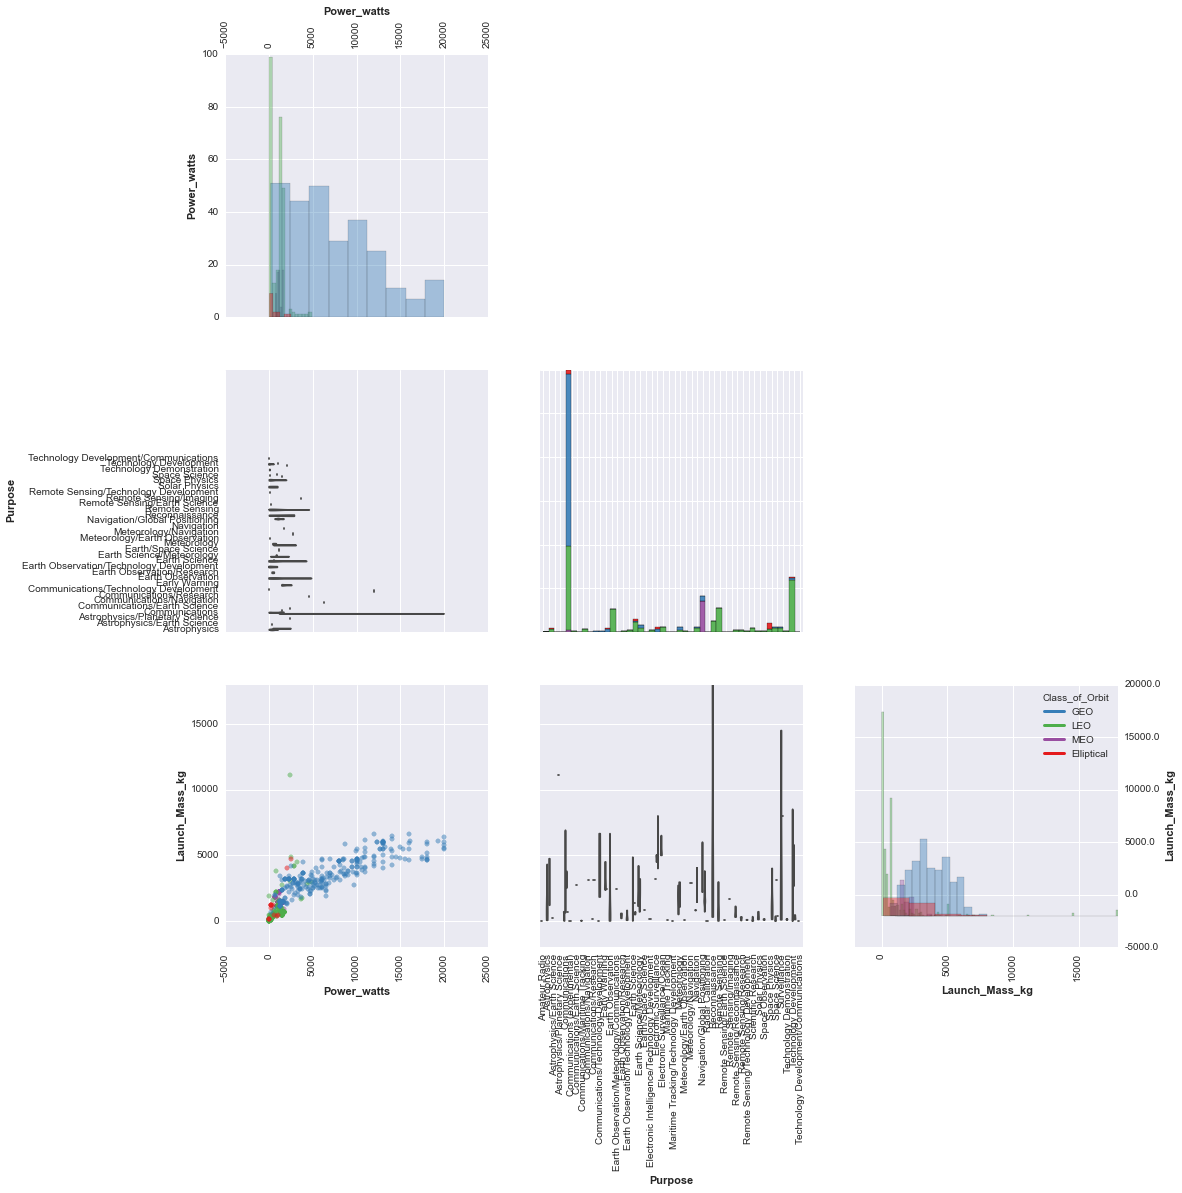

In [10]:
satellites.pairplot_vars(['purpose', 'power_watts', 'launch_mass_kg'], colorby='class_of_orbit', show_contour=False);

### Pairplots: with SQL `WHERE`

The purposes are hard to read, and we may not be interested in all of them. Say we're interested only in meteorology satellites of one variety or another. It's easy to restrict to just those if you use `pairplot` instead of `pairplot_vars`, and use a bit of extra BQL:

BQL [SELECT purpose, power_watts, launch_mass_kg, class_of_orbit 
 FROM satellites 
 WHERE purpose LIKE '%Meteorology%';] ()

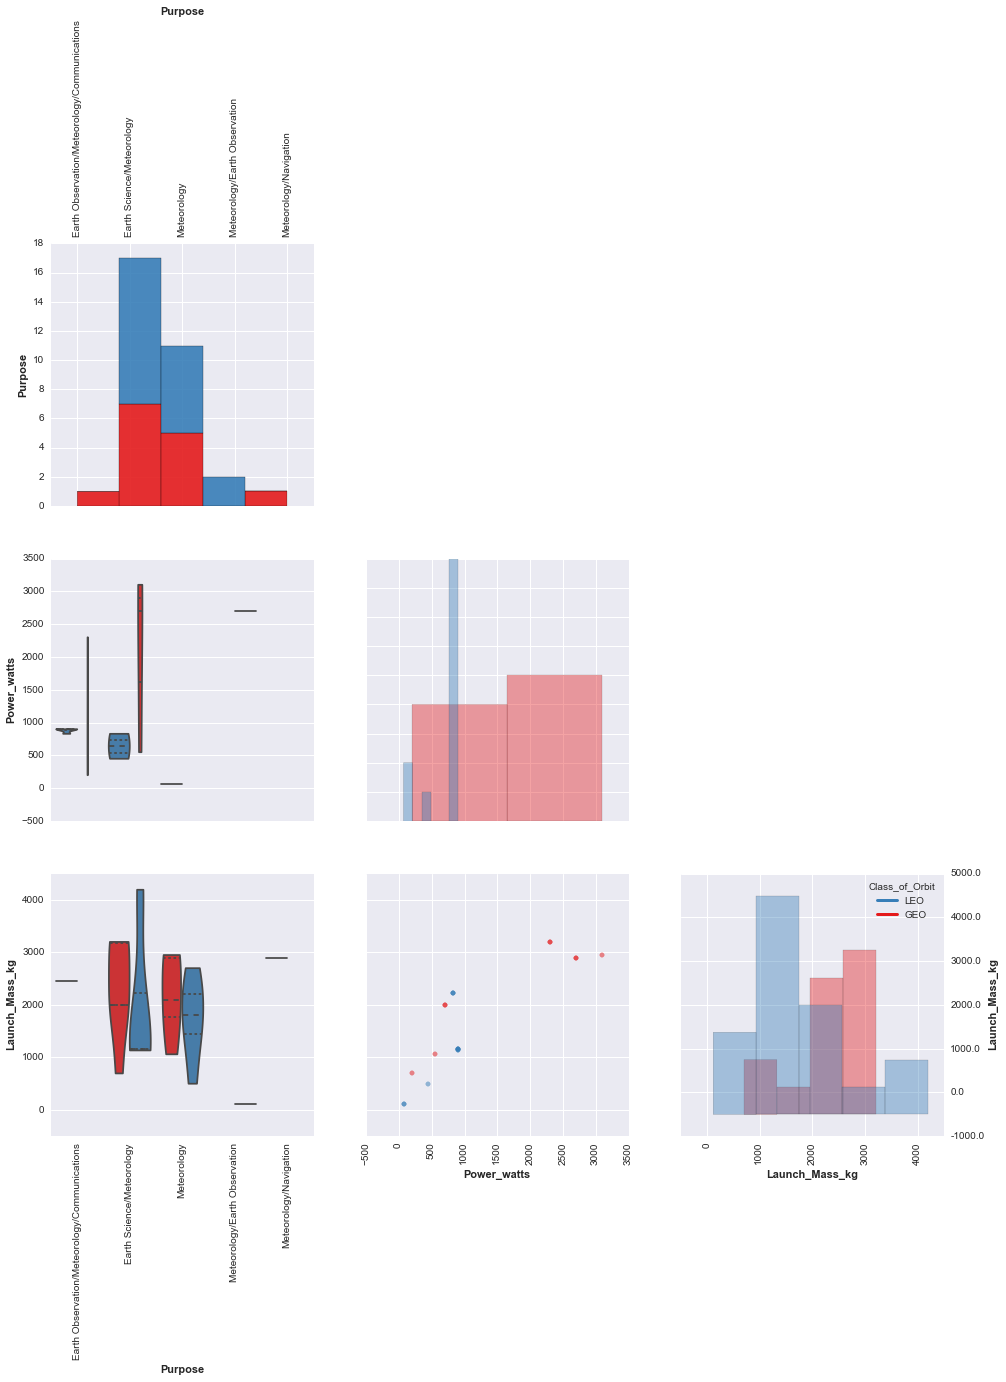

In [11]:
satellites.pairplot('''SELECT purpose, power_watts, launch_mass_kg, class_of_orbit 
                       FROM satellites 
                       WHERE purpose LIKE '%Meteorology%';''', 
                    colorby='class_of_orbit', show_contour=False);

We might learn that meteorology satellites in geosynchronous orbit use about as much or more power than meteorology satellites in low-earth orbit (see power_watts row of plots), but that they use a little less power *at a given mass* (see scatter of launch mass vs. power_watts), and that there are no meteorology satellites in medium earth orbit or in elliptical orbits (class_of_orbit color legend box). 

An expert might be able to help us interpret these observations, e.g. why certain orbits are preferred for meteorology, what the driving considerations are for power consumption and launch mass, etc., but pairplots are a powerful tool for visually finding questions to ask.

### Pairplots: `show_contour`

Why did we choose not to show contours?  Let's try:

BQL [SELECT purpose, power_watts, launch_mass_kg, class_of_orbit 
 FROM satellites 
 WHERE purpose LIKE '%Meteorology%';] ()

/Users/probcomp/GoogleDrive/ProbComp/venv-2.7.11-0.1.4/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


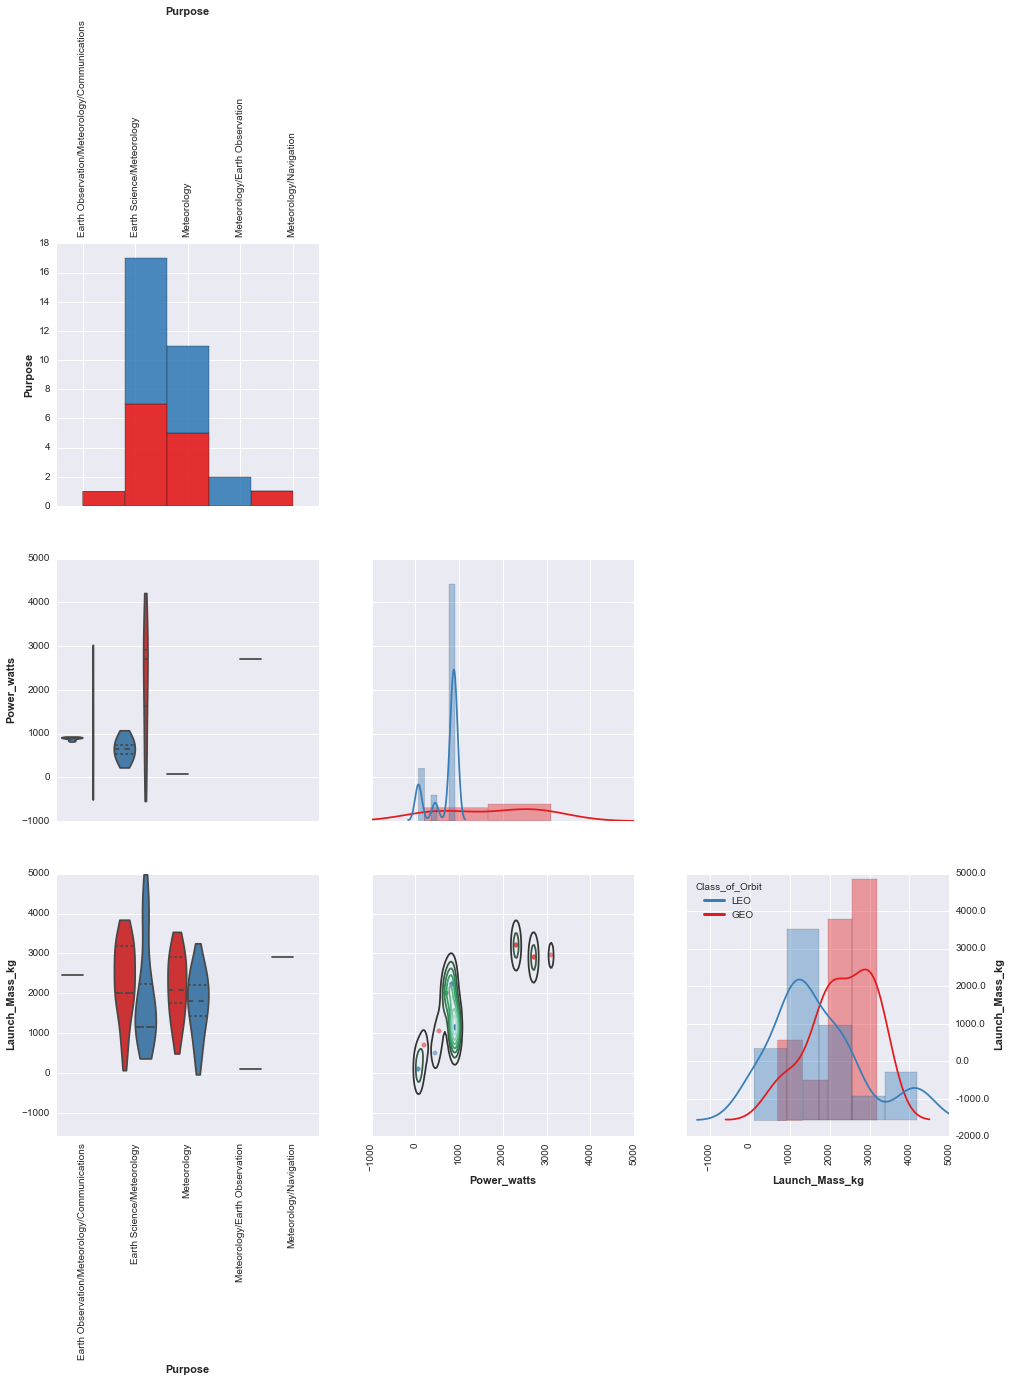

In [12]:
satellites.pairplot('''SELECT purpose, power_watts, launch_mass_kg, class_of_orbit 
                       FROM satellites 
                       WHERE purpose LIKE '%Meteorology%';''', 
                    colorby='class_of_orbit', show_contour=True);

So when we show them, the way the underlying plotting utility works, we see suggestions of negative wattages and masses!

The contours in the power vs. mass plot also obscure the small number of data points, lending a false sense of meaning.

When there are enough data points, it can be useful to plot kernel density estimators (contours) on each plot, to see tendencies overlaid above the data points, so long as one keeps the above shortcomings in mind:

BQL [SELECT power_watts, launch_mass_kg 
 FROM satellites] ()

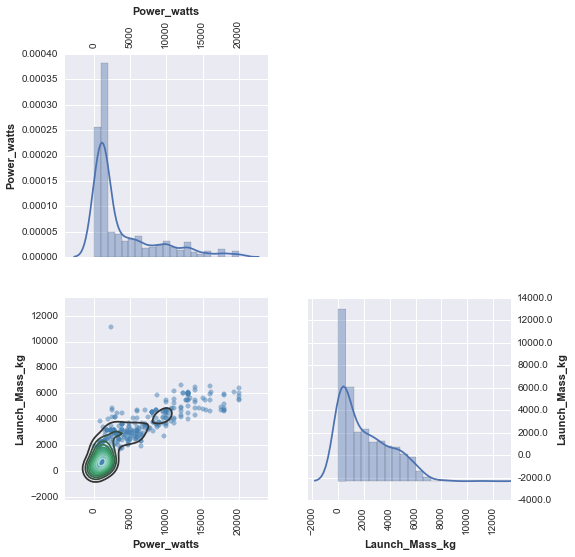

In [13]:
satellites.pairplot('''SELECT power_watts, launch_mass_kg 
                       FROM satellites''', 
                    show_contour=True);

### Pairplots: two categoricals

Where two variables are both categorical, we show a 2d histogram (a heatmap). 

Also, we can turn off the one-variable histograms along the diagonal:

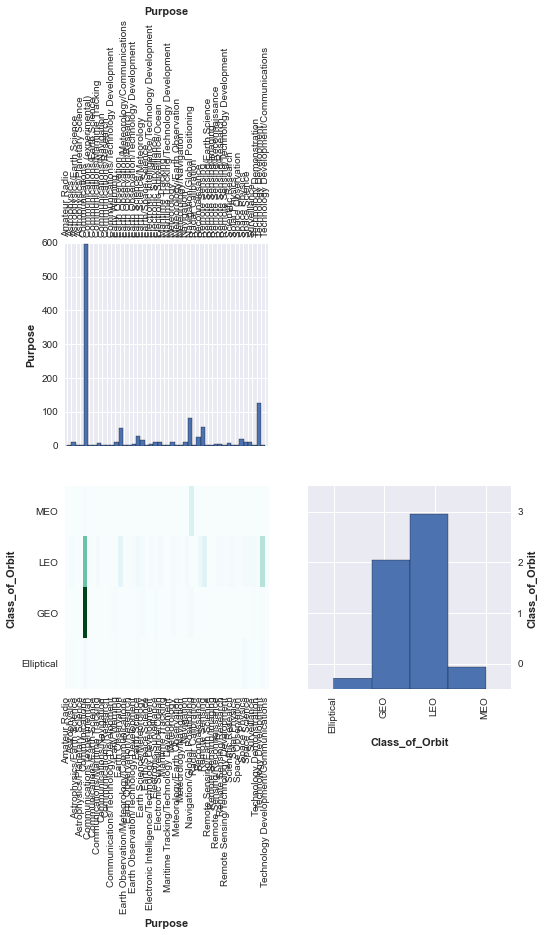

In [14]:
satellites.pairplot_vars(['purpose', 'class_of_orbit']);

### Pairplots: with SQL `HAVING`

We can use the usual SQL constructs to restrict our plot. For example, in this plot of users vs. countries, restrict to those purposes that have at least five satellites:

BQL [SELECT purpose, class_of_orbit FROM "satellites"
 GROUP BY purpose
 HAVING COUNT(purpose) >= 5;] ()

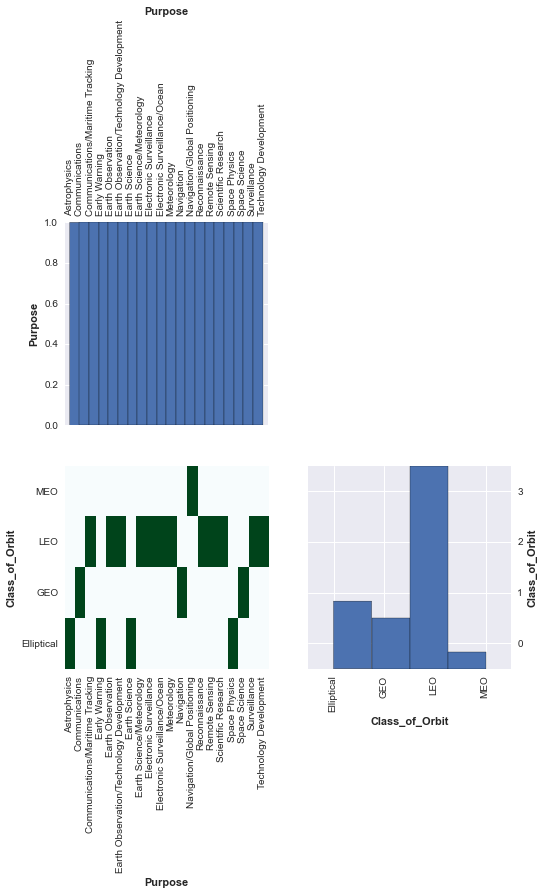

In [15]:
satellites.pairplot('''SELECT purpose, class_of_orbit FROM %t
                       GROUP BY purpose
                       HAVING COUNT(purpose) >= 5;''');

### Pairplots: with `show_missing` and `NULL` values.

In [16]:
satellites.q('''SELECT apogee_km FROM %t WHERE period_minutes is NULL;''')

BQL [SELECT apogee_km FROM "satellites" WHERE period_minutes is NULL;] ()

,Apogee_km
0,35500
1,NaN


When we pairplot these, normally that data point would simply be missing, but with `show_missing`, there is a line indicating that period_minutes could be anything at an apogee around 35k.

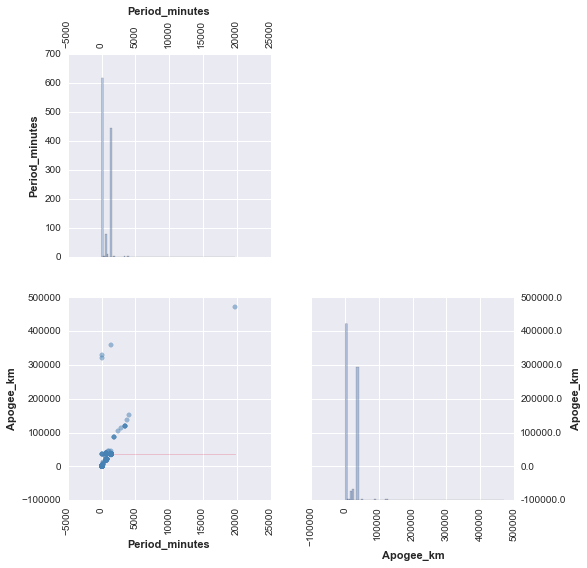

In [17]:
satellites.pairplot_vars(['period_minutes', 'apogee_km'], show_missing=True);

### Pairplots: with SQL arithmetic

The values are large enough to be hard to read, but of course we can resolve that in the query:

BQL [SELECT period_minutes / 60.0 as period_hours, apogee_km / 1000.0 as apogee_x1000km FROM "satellites"] ()

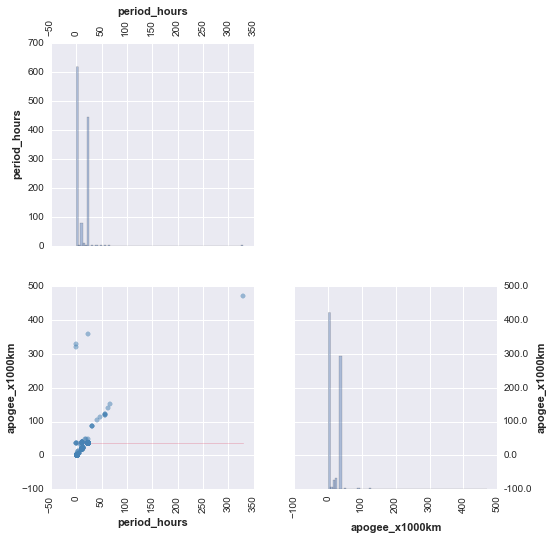

In [18]:
satellites.pairplot('''SELECT period_minutes / 60.0 as period_hours, apogee_km / 1000.0 as apogee_x1000km FROM %t''', 
                    show_missing=True, show_contour=False);

---------------

# Other Plot Types

### Barplot

In [19]:
help(satellites.barplot)

Help on method bdbcontrib.plot_utils.barplot in bdbcontrib.plot_utils:

bdbcontrib.plot_utils.barplot(self, *args, **kwargs) method of bdbcontrib.population.Population instance
    wrapped as population.barplot(df)
    
    Make bar-plot from categories and their heights.
    
        First column specifies names; second column specifies heights.
    
        Parameters
        ----------
    
        df : a pandas.DataFrame or BQL query.
    
        Returns
        ----------
        figure: matplotlib.figure.Figure



BQL [SELECT class_of_orbit, count(*) AS class_count 
 FROM satellites 
 GROUP BY class_of_orbit
 ORDER BY class_count DESC] ()

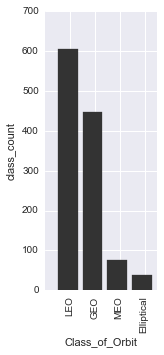

In [20]:
satellites.barplot('''SELECT class_of_orbit, count(*) AS class_count 
                      FROM satellites 
                      GROUP BY class_of_orbit
                      ORDER BY class_count DESC''');

Let's add the type of orbit too:

BQL [SELECT class_of_orbit || "--" || type_of_orbit as class_type, count(*) AS class_type_count
 FROM satellites 
 GROUP BY class_type
 ORDER BY class_type_count DESC] ()

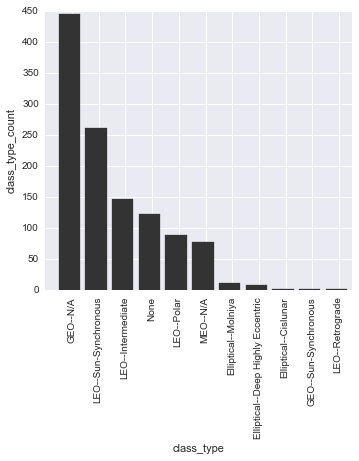

In [21]:
satellites.barplot('''SELECT class_of_orbit || "--" || type_of_orbit as class_type, count(*) AS class_type_count
                      FROM satellites 
                      GROUP BY class_type
                      ORDER BY class_type_count DESC''');

One can even do a bit of computation here, in this case computing and plotting the average power_watts, rather than the merely the count:

BQL [SELECT class_of_orbit || "--" || type_of_orbit as class_type, sum(power_watts)/count(*) AS average_power
 FROM satellites
 GROUP BY class_type
 ORDER BY average_power DESC] ()

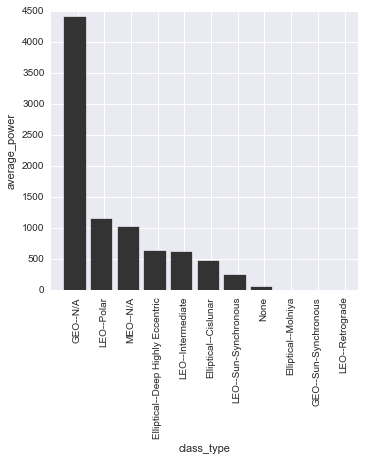

In [22]:
satellites.barplot('''SELECT class_of_orbit || "--" || type_of_orbit as class_type, sum(power_watts)/count(*) AS average_power
                      FROM satellites
                      GROUP BY class_type
                      ORDER BY average_power DESC''');

## Histogram

In [23]:
help(satellites.histogram)

Help on method bdbcontrib.plot_utils.histogram in bdbcontrib.plot_utils:

bdbcontrib.plot_utils.histogram(self, *args, **kwargs) method of bdbcontrib.population.Population instance
    wrapped as population.histogram(df, nbins=15, bins=None, normed=None)
    
    Plot histogram of one- or two-column table.
    
        If two-column, subdivide the first column according to labels in
        the second column
    
        Parameters
        ----------
    
        df : a pandas.DataFrame or BQL query.
        nbins : int, optional
            Number of bins in the histogram.
        normed : bool, optional
            If True, normalizes the the area of the histogram (or each
            sub-histogram if df has two columns) to 1.
    
        Returns
        ----------
        figure: matplotlib.figure.Figure



BQL [SELECT dry_mass_kg FROM "satellites"] ()

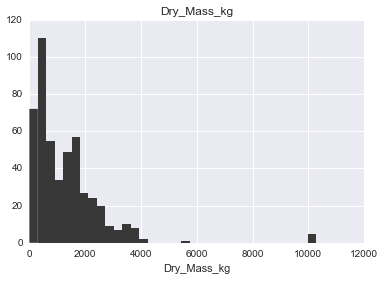

In [24]:
satellites.histogram('SELECT dry_mass_kg FROM %t', nbins=35);

We can break down that silhouette according to a categorical column that comes second.

We can also show percentages rather than absolute counts using `normed`.

BQL [SELECT dry_mass_kg, class_of_orbit FROM satellites 
 WHERE dry_mass_kg < 5000] ()

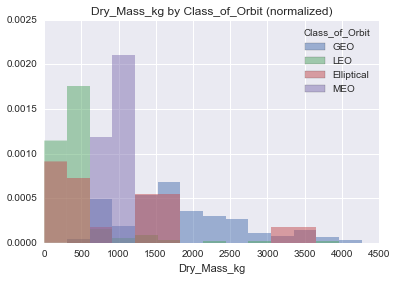

In [25]:
satellites.histogram('''SELECT dry_mass_kg, class_of_orbit FROM satellites 
                        WHERE dry_mass_kg < 5000''', nbins=15, normed=True);

### Heatmap (a.k.a. 2d histogram)

In [26]:
help(satellites.heatmap)

Help on method bdbcontrib.plot_utils.heatmap in bdbcontrib.plot_utils:

bdbcontrib.plot_utils.heatmap(self, *args, **kwargs) method of bdbcontrib.population.Population instance
    wrapped as population.heatmap(data_df, row_ordering=None, col_ordering=None, **kwargs)
    
    Plot heatmaps, optionally clustered.
    
        Parameters
        ----------
        deps : a pandas.DataFrame or BQL query.
            Must have two categorical columns and a numeric column.
            The format is assumed to be that the numeric column of values is last,
            and the two categorical columns are immediately before that.
    
            The canonical example of that kind of data is the result of an
            ESTIMATE ... PAIRWISE query, estimating dependence probability,
            mutual information, correlation, etc.
    
            If your columns are not at the end that way, then pass pivot_kws too.
    
        row_ordering, col_ordering : list<int>
            Specify the or

BQL [SELECT users, country_of_operator, COUNT(country_of_operator) as country_count FROM "satellites"
 GROUP BY country_of_operator
 HAVING COUNT(country_of_operator) >= 5;] ()

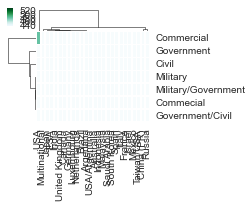

In [27]:
satellites.heatmap('''SELECT users, country_of_operator, COUNT(country_of_operator) as country_count FROM %t
                      GROUP BY country_of_operator
                      HAVING COUNT(country_of_operator) >= 5;''')

### Figsize

But that's a bit too small to read. For most of these plot functions, you can specify a figure size as a tuple (width-in-inches, height-in-inches):

BQL [SELECT users, country_of_operator, COUNT(country_of_operator) as country_count FROM "satellites"
 GROUP BY country_of_operator
 HAVING COUNT(country_of_operator) >= 5;] ()

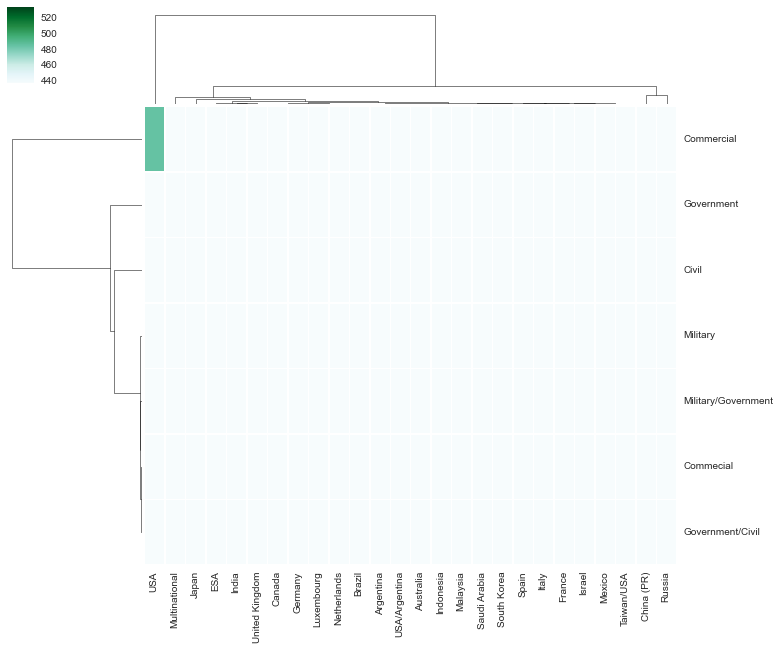

In [28]:
satellites.heatmap('''SELECT users, country_of_operator, COUNT(country_of_operator) as country_count FROM %t
                      GROUP BY country_of_operator
                      HAVING COUNT(country_of_operator) >= 5;''', 
                  figsize=(12, 10))

--------------------------------------------

Copyright (c) 2010-2016, MIT Probabilistic Computing Project

Licensed under Apache 2.0 (edit cell for details).

<!--
   Licensed under the Apache License, Version 2.0 (the "License");
   you may not use this file except in compliance with the License.
   You may obtain a copy of the License at

       http://www.apache.org/licenses/LICENSE-2.0

   Unless required by applicable law or agreed to in writing, software
   distributed under the License is distributed on an "AS IS" BASIS,
   WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
   See the License for the specific language governing permissions and
   limitations under the License.
-->